This file generates the randomized hyperparmaters in the hyperparameter search.

In [152]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
total_evaluations = 600
experiments = 25

In [154]:
# initialize dataframe 
d = {"pop_size":[], "gens":[], "mut_prob":[], "mate_prob":[], "select_op":[], 
     "k":[], "tournsize":[], "mut_op":[], "mate_op":[], "experiment_num":[]}

In [155]:
for i in range(35,40):
    pop_size = 60#random.randint(20, 60)
    gens = int(np.ceil(total_evaluations / pop_size))
    mut_prob = random.uniform(0.2, 0.3)
    mate_prob = random.uniform(0.45, 0.6)

    select_op = "selTournament" #random.choice(["selTournament", "selNSGA2", "selBest"])
    k = 15 #random.randint(round(pop_size / 3), round(pop_size / 3 * 2))
    if select_op == "selTournament":
        tournsize = 5#random.randint(2, 8)
        select_op_dict = {"operator": select_op, "k": k, "tournsize": tournsize}
    else:
        select_op_dict = {"operator": select_op, "k": k}
        tournsize = None 

    mut_op = "mutPolynomialBounded"
    indpb, eta = mut_prob, mut_prob
    mut_op_dict = {"operator": mut_op, "eta": eta, "indpb": indpb}

    mate_op = random.choice(["cxOnePoint", "cxBlend"])
    if mate_op == "cxUniform":
        indpb = mate_prob
        mate_op_dict = {"operator": mate_op, "indpb": indpb}
    elif mate_op == "cxBlend":
        alpha = mate_prob
        mate_op_dict = {"operator": mate_op, "alpha": alpha}
    else:
        mate_op_dict = {"operator": mate_op}
    
    # pandas dataframe 
    d["pop_size"].append(pop_size)
    d["gens"].append(gens)
    d["mut_prob"].append(mut_prob)
    d["mate_prob"].append(mate_prob)
    d["select_op"].append(select_op)
    d["k"].append(k)
    d["tournsize"].append(tournsize)
    d["mut_op"].append(mut_op)
    d["mate_op"].append(mate_op)
    d["experiment_num"].append(i)

In [156]:
df_2 = pd.DataFrame(data=d)
df_2 = df_2.set_index("experiment_num")

In [157]:
df = pd.read_csv("coarse_search_hyperparameters.csv", index_col="experiment_num")
df = df.append(df_2)

In [158]:
df

,pop_size,gens,mut_prob,mate_prob,select_op,k,tournsize,mut_op,mate_op
experiment_num,,,,,,,,,
0,21,29,0.157617,0.527051,selTournament,13,7.0,mutPolynomialBounded,cxOnePoint
1,63,10,0.166172,0.513330,selNSGA2,22,NaN,mutPolynomialBounded,cxBlend
2,93,7,0.296026,0.277389,selTournament,42,8.0,mutPolynomialBounded,cxBlend
3,67,9,0.177595,0.400426,selTournament,23,4.0,mutPolynomialBounded,cxBlend
4,87,7,0.276113,0.217605,selBest,40,NaN,mutPolynomialBounded,cxOnePoint
5,64,10,0.109872,0.372388,selTournament,21,3.0,mutPolynomialBounded,cxUniform
6,83,8,0.326200,0.175023,selTournament,38,7.0,mutPolynomialBounded,cxOnePoint
7,43,14,0.299562,0.446814,selBest,17,NaN,mutPolynomialBounded,cxBlend
8,86,7,0.308425,0.470644,selTournament,33,2.0,mutPolynomialBounded,cxOnePoint


Text(0.5, 1.0, 'tournsize')

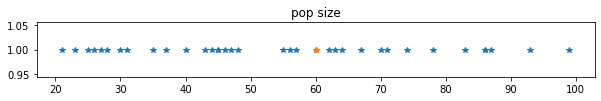

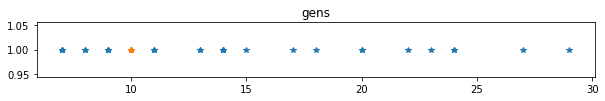

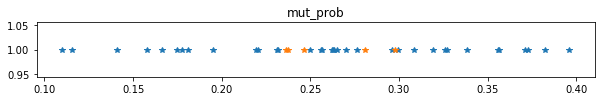

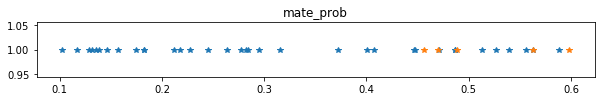

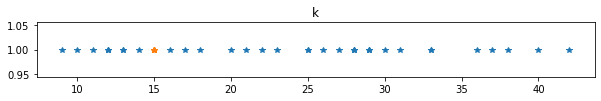

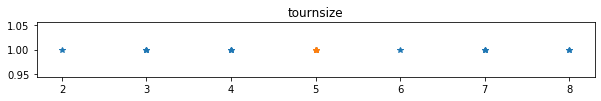

In [159]:
experiments = 40
fine = 35
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(df["pop_size"][:fine],np.ones(experiments)[:fine],"*")
ax.plot(df["pop_size"][fine:],np.ones(experiments)[fine:],"*")
ax.set_title("pop size")
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(df["gens"][:fine],np.ones(experiments)[:fine],"*")
ax.plot(df["gens"][fine:],np.ones(experiments)[fine:],"*")
ax.set_title("gens")
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(df["mut_prob"][:fine],np.ones(experiments)[:fine],"*")
ax.plot(df["mut_prob"][fine:],np.ones(experiments)[fine:],"*")
ax.set_title("mut_prob")
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(df["mate_prob"][:fine],np.ones(experiments)[:fine],"*")
ax.plot(df["mate_prob"][fine:],np.ones(experiments)[fine:],"*")
ax.set_title("mate_prob")
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(df["k"][:fine],np.ones(experiments)[:fine],"*")
ax.plot(df["k"][fine:],np.ones(experiments)[fine:],"*")
ax.set_title("k")
fig, ax = plt.subplots(figsize=(10,1))
ax.plot(df["tournsize"][:fine],np.ones(experiments)[:fine],"*")
ax.plot(df["tournsize"][fine:],np.ones(experiments)[fine:],"*")
ax.set_title("tournsize")

In [160]:
df.to_csv("coarse_search_hyperparameters.csv")